# Домашняя работа 1

Алексеева Валентина

In [1]:
!pip install ogb --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.3 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency res

In [2]:
from ogb.nodeproppred import NodePropPredDataset
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

## 1. Загрузка данных

In [3]:
dataset = NodePropPredDataset(name='ogbn-arxiv', root='data')
graph, labels = dataset[0]

print("Количество узлов:", graph["num_nodes"])
print("Количество рёбер:", graph["edge_index"].shape[1])

Downloaded 0.08 GB: 100%|██████████| 81/81 [00:17<00:00,  4.71it/s]


Extracting data/arxiv.zip
Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:00<00:00, 7653.84it/s]

Saving...


Количество узлов: 169343
Количество рёбер: 1166243


In [4]:
edge_index = graph["edge_index"].T  # np.array (1.1M × 2)
G = nx.DiGraph()
G.add_edges_from(edge_index)
G = G.to_undirected()

# подграф
N_SAMPLE = 20000  
rng = np.random.default_rng(42)
sample_nodes = rng.choice(list(G.nodes), size=N_SAMPLE, replace=False)
H = G.subgraph(sample_nodes).copy()

print("Размер подграфа H:",
      H.number_of_nodes(), "узлов,",
      H.number_of_edges(), "рёбер")

Размер подграфа H: 20000 узлов, 18778 рёбер


Визуализируйте граф на семпле из 1000 узлов

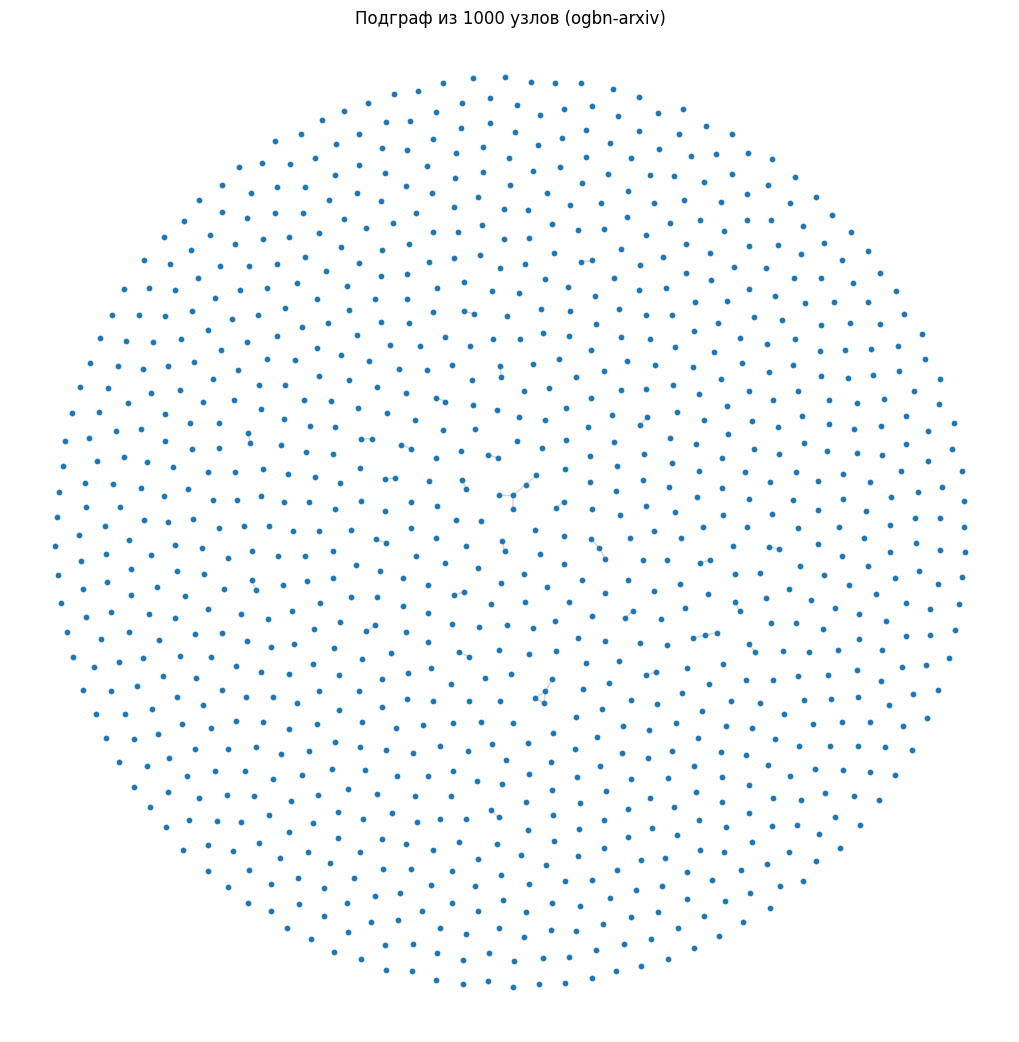

In [5]:
# TODO: визуализация

VIS_N = 1000
vis_nodes = list(H.nodes)[:VIS_N]
H_vis = H.subgraph(vis_nodes).copy()

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(H_vis, seed=42)

nx.draw(
    H_vis,
    pos,
    node_size=10,
    node_color="tab:blue",
    edge_color="lightgray",
    with_labels=False
)

plt.title(f"Подграф из {H_vis.number_of_nodes()} узлов (ogbn-arxiv)")
plt.show()

### Предварительный анализ

Произведем предварительный анализ графа

In [6]:
n = H.number_of_nodes()
m = H.number_of_edges()

# TODO: средняя степень
avg_degree = 2 * m / n

# TODO: плотность графа
density = nx.density(H)

# TODO: диаметер графа
largest_cc = max(nx.connected_components(H), key=len)
H_cc = H.subgraph(largest_cc).copy()

diameter = nx.diameter(H_cc)

# TODO: радиус графа
radius = nx.radius(H_cc)

print(f"Средняя степень: {avg_degree:.2f}")
print(f"Плотность: {density:.6f}")
print(f"Диаметер графа: {diameter:.4f}")
print(f"Радиус графа: {radius:.4f}")

Средняя степень: 1.88
Плотность: 0.000094
Диаметер графа: 29.0000
Радиус графа: 15.0000


### Анализ на центральность

Найдите узел с максимальной центральностью

In [7]:
# TODO: Вычисление центральности по степени (degree centrality)
degree_centrality = nx.degree_centrality(H)
print("Центральность по степени:", degree_centrality)

# TODO: Вычисление центральности по близости (closeness centrality)
closeness_centrality = nx.closeness_centrality(H)
print("Центральность по близости:", closeness_centrality)

# TODO: Вычисление центральности по междуузловой значимости (betweenness centrality)
betweenness_centrality = nx.betweenness_centrality(H)
print("Центральность по междуузловой значимости:", betweenness_centrality)


Центральность по степени: {131075: 0.0001000050002500125, 8: 0.0, 131090: 0.0, 19: 5.000250012500625e-05, 20: 5.000250012500625e-05, 18: 0.0, 131099: 0.0, 35: 0.00015000750037501875, 131108: 5.000250012500625e-05, 131111: 0.0, 40: 0.0, 131114: 5.000250012500625e-05, 45: 0.0, 46: 5.000250012500625e-05, 131121: 0.0, 57: 0.0, 131130: 0.0001000050002500125, 59: 0.0, 84: 0.0001000050002500125, 94: 0.0, 131171: 5.000250012500625e-05, 99: 0.0, 131179: 0.0, 131180: 0.0, 131182: 0.0, 131189: 0.0, 131190: 5.000250012500625e-05, 131194: 5.000250012500625e-05, 131196: 0.00015000750037501875, 131204: 0.0, 131207: 0.0, 139: 0.0, 147: 5.000250012500625e-05, 148: 5.000250012500625e-05, 149: 5.000250012500625e-05, 151: 0.0001000050002500125, 131225: 0.0, 155: 0.00015000750037501875, 131228: 0.0, 131230: 0.0, 131232: 0.0, 167: 0.0, 131246: 0.0, 174: 0.0, 131250: 5.000250012500625e-05, 182: 0.0, 131255: 0.00040002000100005, 131254: 5.000250012500625e-05, 185: 0.0, 131256: 0.0005500275013750688, 131260: 5

Анализ кластеров

In [8]:
# TODO: Вычислите средний кластерный коэффициент графа
global_cluster_coeff = nx.average_clustering(H)
print("Cредний кластерный коэффициент графа:", global_cluster_coeff)


Cредний кластерный коэффициент графа: 0.08570047521071426


In [9]:
# TODO: Вычислите коэффициент транзитивности
transitivity_coeff = nx.transitivity(H)
print("Коэффициент транзитивности графа:", transitivity_coeff)


Коэффициент транзитивности графа: 0.01154076367023556


### Поиск сообществ

Реализуйте 2 метода поиска сообществ:
1. С помощью готовой реализации в библиотеке NetworkX
2. Реализуйте самостоятельно класс с алгоритмом Clauset–Newman–Moore

Сравните полученные результаты

Алгоритм Clauset–Newman–Moore (CNM)

---

**1. Начальное состояние**
- Каждая вершина — отдельное сообщество.  
- Вычисляем степени вершин и матрицу смежности.

---

**2. Вычисляем для всех пар сообществ** $(r, s)$, между которыми есть хотя бы одно ребро:

$$
\Delta Q_{rs} = 2 \, (e_{rs} - a_r a_s)
$$

где:  

- $e_{rs}$ — доля рёбер между сообществами *r* и *s*, делённая на $2m$;  
- $a_r = \sum_t e_{rt}$ — доля концов рёбер, инцидентных *r*.

---

**2.1. Доля концов рёбер, инцидентных вершинам из $r$**

Это часть всех концов рёбер в графе, которые принадлежат вершинам, входящим в сообщество $r$.

Эта величина обозначается как $a_r$ и вычисляется по формуле:

$$
a_r = \frac{1}{2m} \sum_{i \in r} k_i
$$

где:  

- $k_i$ — степень вершины $i$ (сколько у неё рёбер);  
- $m$ — общее число рёбер в графе;  
- $2m$ — общее количество **концов рёбер** (так как каждое ребро имеет два конца).

---

**3. Выбираем пару $(r, s)$** с максимальным $\Delta Q$ и объединяем их.

---

**4. Обновляем:**
- значения $e_{rt}, a_r$;  
- новую модульность:  
  $$
  Q \leftarrow Q + \Delta Q
  $$

---

**5. Повторяем**, пока $\Delta Q > 0$.

---

**6. Выбираем состояние с максимальным $Q$** как оптимальное разбиение.


Описание алгоритма - https://arxiv.org/pdf/cond-mat/0408187

In [10]:
class CNM:
    """
    Алгоритм Clauset–Newman–Moore для обнаружения сообществ.
    TODO: Заполните пропущенные участки кода.
    """

    def __init__(self, edges):
        self.graph = defaultdict(dict)
        for u, v, w in edges:
            if u == v: continue
            self.graph[u][v] = self.graph[u].get(v, 0) + w
            self.graph[v][u] = self.graph[v].get(u, 0) + w
        self.nodes = list(self.graph.keys())
        self.m = sum(sum(self.graph[u].values()) for u in self.nodes) / 2
        self.deg = {u: sum(self.graph[u].values()) for u in self.nodes}

    def fit(self, verbose=False):
        communities = {u: {u} for u in self.nodes}
        comm_id = {u: u for u in self.nodes}
        m2 = 2 * self.m
        a = {u: self.deg[u] / m2 for u in self.nodes}

        # TODO 0: Доля рёбер между сообществами
        # e[r][s] — доля рёбер между сообществами r и s, делённая на 2m
        e = defaultdict(lambda: defaultdict(float))
        
        for u in self.nodes:
            for v, w in self.graph[u].items():
                # считаем каждое неориентированное ребро один раз
                if u < v:
                    cu, cv = comm_id[u], comm_id[v]
                    e[cu][cv] += w / m2
                    e[cv][cu] += w / m2
        # Начальная модульность
        Q = -sum(a[c] ** 2 for c in a)

        # Основной цикл
        while True:
            best_dQ = 0
            best_pair = None

            # TODO 1: Найти пару (r, s) с максимальным ΔQ
            for r in e:
                for s, e_rs in e[r].items():
                    if s <= r:
                        continue  # рассматриваем каждую пару один раз и без (r, r)
                    dQ = 2 * (e_rs - a[r] * a[s])
                    if dQ > best_dQ:
                        best_dQ = dQ
                        best_pair = (r, s)
                        
            # TODO 2: Условие выхода
            if best_pair is None or best_dQ <= 0:  # TODO
                break

            r, s = best_pair
            if verbose:
                print(f"Объединяем {r}, {s} с ΔQ={best_dQ:.6f}")

            # TODO 3: Объединение сообществ
            members_s = communities[s]
            communities[r].update(members_s)
            
            for node in members_s:
                comm_id[node] = r
            communities[s] = set()

            # TODO 4: Обновление a, e, Q
            # 4.1 Обновляем a_r и удаляем a_s
            a[r] = a[r] + a[s]
            a.pop(s, None)

            # 4.2 Обновляем e_{rt} = e_{rt} + e_{st} для всех соседей t
            if s in e:
                for t, e_st in list(e[s].items()):
                    if t == r:
                        # связь r–s стала внутренней, e_rr не храним
                        pass
                    else:
                        e_rt = e[r].get(t, 0.0)
                        new_val = e_rt + e_st
                        if new_val > 0:
                            e[r][t] = new_val
                            e[t][r] = new_val
                        else:
                            e[r].pop(t, None)
                            e[t].pop(r, None)
                    # очищаем старые связи с s
                    e[t].pop(s, None)
                e.pop(s, None)
            # на всякий случай убираем возможную запись r–s
            e[r].pop(s, None)

            # 4.3 Обновляем модульность
            Q += best_dQ


        final_comms = [c for c in communities.values() if c]
        return final_comms, Q

In [11]:
edges = [(u, v, 1.0) for u, v in H.edges()]
model = CNM(edges)
comms, Q_my = model.fit(verbose=True)

# NetworkX эталон
nx_comms = list(greedy_modularity_communities(H))
Q_nx = modularity(H, nx_comms)

print("\n=== Сравнение ===")
print("CNM (наш)  Q =", round(Q_my, 5))
print("NetworkX    Q =", round(Q_nx, 5))
print("Количество сообществ:", len(comms))


Объединяем 79031, 131114 с ΔQ=0.000053
Объединяем 79510, 131171 с ΔQ=0.000053
Объединяем 149, 157798 с ΔQ=0.000053
Объединяем 121862, 131260 с ΔQ=0.000053
Объединяем 131279, 165068 с ΔQ=0.000053
Объединяем 131446, 152853 с ΔQ=0.000053
Объединяем 108813, 131479 с ΔQ=0.000053
Объединяем 707, 156335 с ΔQ=0.000053
Объединяем 48669, 131825 с ΔQ=0.000053
Объединяем 959, 131836 с ΔQ=0.000053
Объединяем 114174, 131962 с ΔQ=0.000053
Объединяем 98926, 131967 с ΔQ=0.000053
Объединяем 901, 75318 с ΔQ=0.000053
Объединяем 986, 90943 с ΔQ=0.000053
Объединяем 40501, 132103 с ΔQ=0.000053
Объединяем 1051, 118450 с ΔQ=0.000053
Объединяем 1072, 22720 с ΔQ=0.000053
Объединяем 33960, 132232 с ΔQ=0.000053
Объединяем 132279, 154565 с ΔQ=0.000053
Объединяем 88769, 132361 с ΔQ=0.000053
Объединяем 4058, 132410 с ΔQ=0.000053
Объединяем 1342, 73964 с ΔQ=0.000053
Объединяем 1360, 72958 с ΔQ=0.000053
Объединяем 15444, 132435 с ΔQ=0.000053
Объединяем 1398, 114595 с ΔQ=0.000053
Объединяем 1401, 94918 с ΔQ=0.000053
Объ

Визуализация результатов

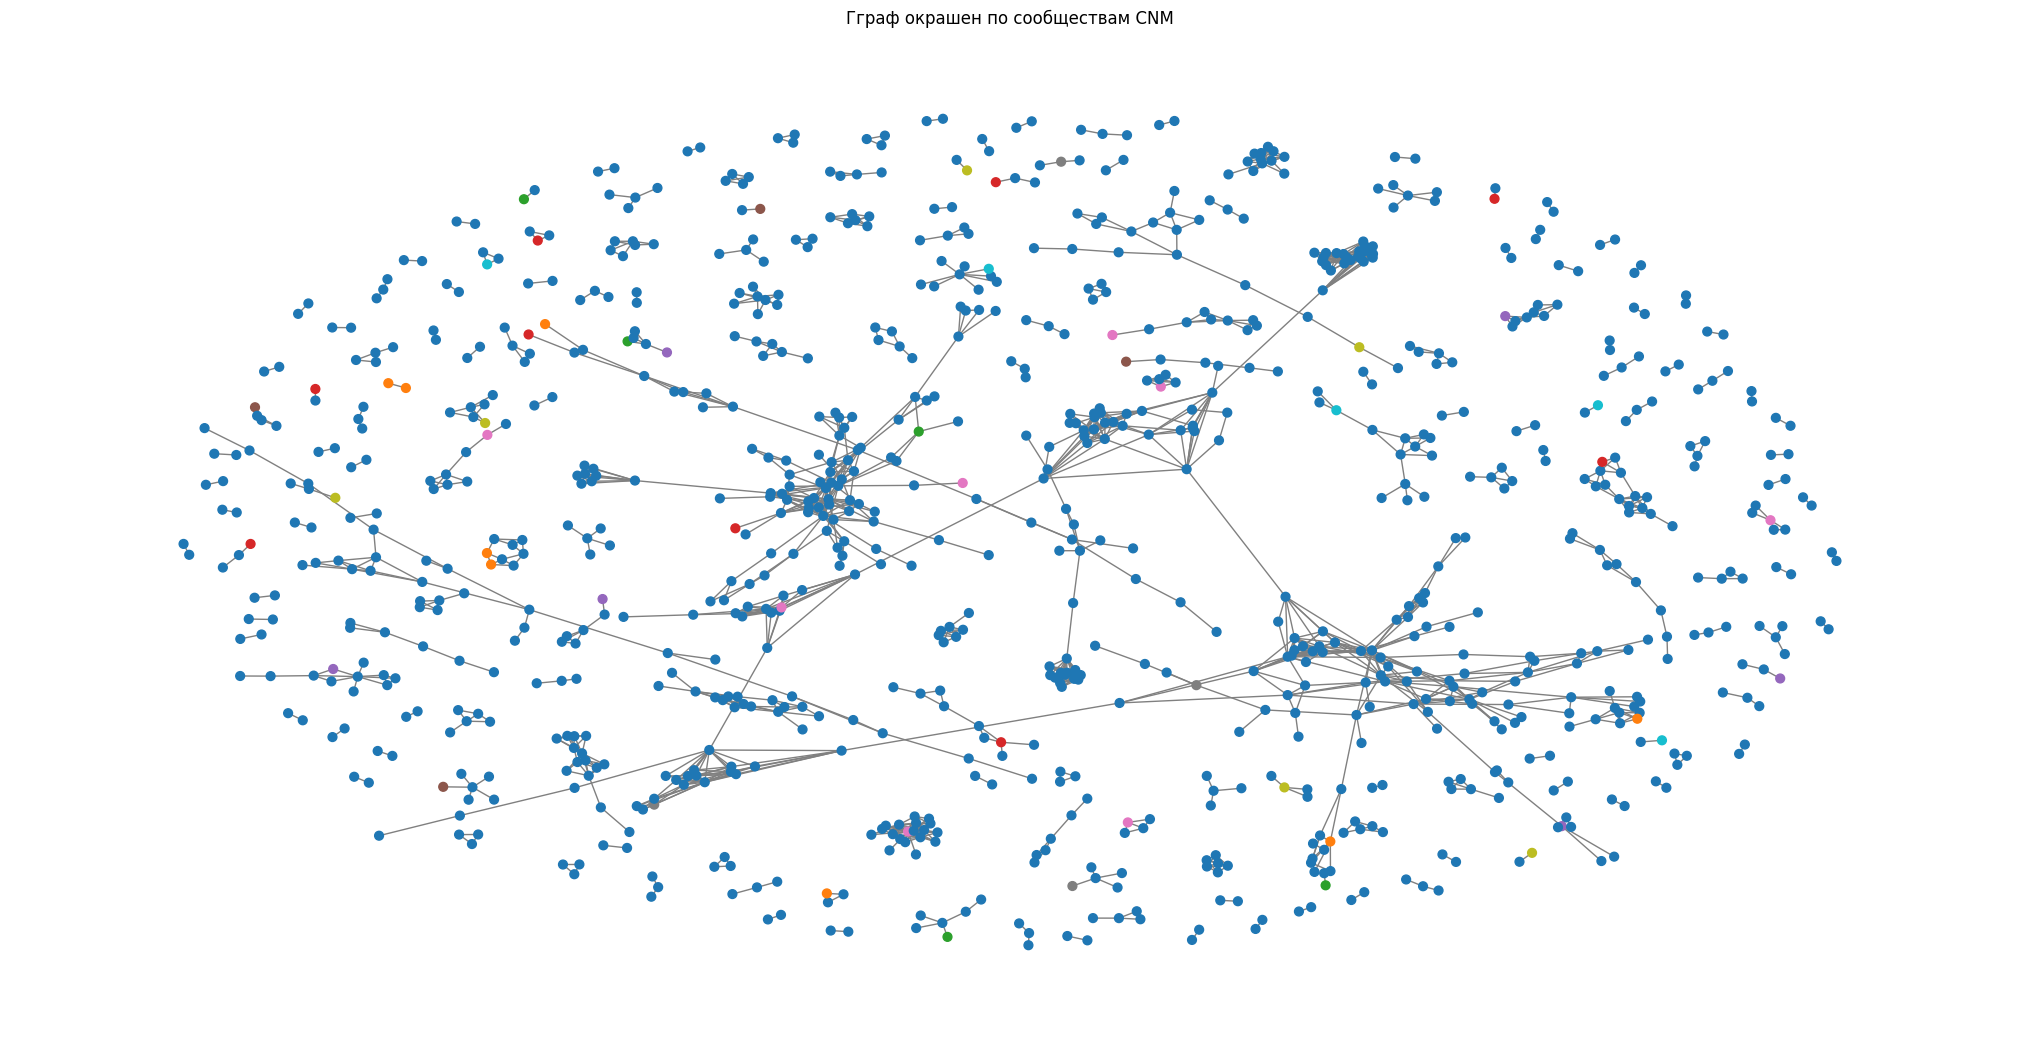

In [12]:
plt.figure(figsize=(20, 10))
sub_nodes = list(G.nodes)[:1000]
H = G.subgraph(sub_nodes)

# создаём отображение: node -> community_id
node2comm = {}
for i, comm in enumerate(nx_comms):
    for n in comm:
        node2comm[n] = i

colors = [node2comm.get(n, 0) for n in H.nodes()]
nx.draw(H, node_color=colors, node_size=40, edge_color="gray", with_labels=False, cmap="tab10")
plt.title("Гграф окрашен по сообществам CNM")
plt.show()